# This notebook demonstrates a typical pipeline of running MAMP experiments

## Import

In [8]:
import numpy as np
import sys
sys.path.append('../')
from testSim import test
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Simulate

In [9]:
env = 'zigzag'
time_pos = test(env, "../problems/{}/problem.yaml".format(env), "../problems/{}/config.yaml".format(env))


----- 0 -----
- Find Collision and Reroute
Printing Solution with Solving Time  0.028311363003012957 s
[0] [0.0, 40.0, 5.0]
[1] [11.640400602418026, 28.359599397581974, 11.238279054022332]
[2] [11.64040060241803, 28.359599397581967, 11.238279054022325]
[3] [17.499999999999996, 22.5, 14.621320343559645]
[4] [26.640400602418033, 13.359599397581967, 11.238279054022325]
[5] [32.5, 7.499999999999998, 14.621320343559644]
[6] [40.0, 0.0, 12.878679656440355]
[7] [51.16724432600957, -10.0, 20.0]
- Feasible Plan Found with Single-agent Travel Time 51.16724432600957
- Find Collision and Reroute
Printing Solution with Solving Time  0.004933997999614803 s
[0] [0.0, 40.0, 20.0]
[1] [11.1672443260096, 29.999999999999982, 12.87867965644034]
[2] [18.66724432600958, 22.5, 14.621320343559645]
[3] [27.807644928427614, 13.359599397581967, 11.238279054022325]
[4] [33.66724432600958, 7.499999999999998, 14.621320343559644]
[5] [47.28930271900026, -6.122058392990683, 6.756621263449675]
[6] [50.74955216148026,

In [10]:
# times = []
# pos = []
# for agent in range(len(time_pos)):
#     times.append(np.array(time_pos[agent])[:,0])
#     pos.append(np.array(time_pos[agent])[:,1:])             

### The results of one experiment is saved in the results/ folder and include the following contents. 
* The environment(yaml)
* The configuration(yaml)
* The planned time-positions(data)
* The actual trajectory(not saved as for now)
* The figure(svg)
* The animation(mp4)

## Save Planning data

In [11]:
import yaml
import os
from problems.util import read_problem,read_configuration

In [12]:
# Save a copy of env and config data
expr_name = '{}_0'.format(env)

for file_prefix in ['problem','config']:
    with open("../problems/{}/{}.yaml".format(env,file_prefix)) as f:
        data = yaml.safe_load(f)

    filename = "../results/{}/{}.yaml".format(expr_name,file_prefix)
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, "w") as f:
        yaml.dump(data,f)

# Save the planned time-positions
filename = "../results/{}/ref.yaml".format(expr_name)
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, "w") as f:
    yaml.dump(time_pos,f)

## Generate Visualization Results

In [13]:
from algs.ref2traj import ref2traj
from viz.plot import plot_results

/home/tianpeng/Desktop/s2m2/notebooks/../viz/plot.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


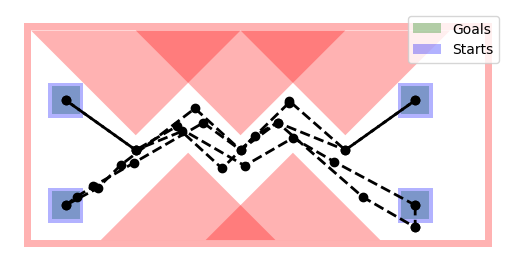

In [14]:
# Load environment and configuration 
name, limits, Obstacles, agents, Thetas, Goals = read_problem("../results/{}/problem.yaml".format(expr_name))
min_segs, max_segs, obs_steps = read_configuration("../results/{}/config.yaml".format(expr_name))

# Plot planning result

file_prefix = expr_name 
filename= "../results/{}/{}.svg".format(expr_name,file_prefix)

trajs = ref2traj(time_pos)

plot_results(agents, limits, Obstacles, Thetas, Goals, trajs, name, refs=time_pos,save_to_path = filename)

In [15]:
from viz.animate_2 import animate_results
from IPython import display

In [16]:
from viz.util import extract_paths
paths = extract_paths(agents, Thetas, trajs)

In [17]:
# Animate the results
file_prefix = expr_name 
filename= "../results/{}/{}.mp4".format(expr_name,file_prefix)
ani = animate_results(agents,limits, Obstacles, Thetas, Goals, paths,save_to_path=filename)
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
# Avoid plotting an extra figure.
plt.close()